In [1]:
import pandas as pd
df=pd.read_csv('training_set_features.csv')
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [2]:
df['respondent_id'].value_counts()

respondent_id
0        1
17736    1
17812    1
17811    1
17810    1
        ..
8898     1
8897     1
8896     1
8895     1
26706    1
Name: count, Length: 26707, dtype: int64

In [3]:
y=pd.read_csv('training_set_labels.csv')
y.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
y=pd.read_csv('training_set_labels.csv')
y.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
y['xyz_vaccine'].value_counts()

xyz_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [6]:
y.isnull().sum()

respondent_id       0
xyz_vaccine         0
seasonal_vaccine    0
dtype: int64

In [7]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
df.shape

(26707, 36)

In [9]:
df['y']=y['xyz_vaccine']

In [10]:
df.shape

(26707, 37)

In [11]:
df['employment_occupation'].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [12]:
df['age_group'].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [13]:


# Perform one-hot encoding on the 'age' column
one_hot_age = pd.get_dummies(df['age_group'], prefix='age_group')
one_hot_age=one_hot_age.astype(int)
# Concatenate the one-hot encoded columns back to the original DataFrame
df = pd.concat([df, one_hot_age], axis=1)

# Drop the original 'age' column if you no longer need it
df = df.drop('age_group', axis=1)



In [14]:
df['age_group_65+ Years']=df['age_group_65+ Years'].astype(int)

In [15]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,household_adults,household_children,employment_industry,employment_occupation,y,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,NaN,NaN,0,0,0,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,pxcmvdjn,xgwztkwe,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,rucpziij,xtkaffoo,0,1,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,wxleyezf,emcorrxb,0,0,0,1,0,0


In [16]:
df['race'].value_counts()


race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64

In [17]:
one_hot_race=pd.get_dummies(df['race'],prefix='age')
one_hot_race=one_hot_race.astype(int)
df=pd.concat([df,one_hot_race],axis=1)
df=df.drop('race',axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,y,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,age_Black,age_Hispanic,age_Other or Multiple,age_White
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
df['sex'].value_counts()

sex
Female    15858
Male      10849
Name: count, dtype: int64

In [19]:
one_hot_sex=pd.get_dummies(df['sex'],prefix='sex')
one_hot_sex=one_hot_sex.astype(int)
df=pd.concat([df,one_hot_sex],axis=1)

df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,age_Black,age_Hispanic,age_Other or Multiple,age_White,sex_Female,sex_Male
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,1,1,0


In [20]:
df=df.drop('sex',axis=1)

In [21]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
h

In [22]:
df['hhs_geo_region'].value_counts()

hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64

In [23]:
one_hot_msa=pd.get_dummies(df['census_msa'])
one_hot_msa=one_hot_msa.astype(int)
df=pd.concat([df,one_hot_msa],axis=1)
df=df.drop('census_msa',axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group_65+ Years,age_Black,age_Hispanic,age_Other or Multiple,age_White,sex_Female,sex_Male,"MSA, Not Principle City","MSA, Principle City",Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,1,0,1,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,1,1,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,1,0,1,0,0


In [24]:
one_hot_hhs=pd.get_dummies(df['hhs_geo_region'])
one_hot_hhs=one_hot_hhs.astype(int)
df=pd.concat([df,one_hot_hhs],axis=1)
df=df.drop('hhs_geo_region',axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
string_columns=df.select_dtypes(include=['object']).columns
print(string_columns)

Index(['education', 'income_poverty', 'marital_status', 'rent_or_own',
       'employment_status', 'employment_industry', 'employment_occupation'],
      dtype='object')


In [26]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
h

In [27]:
df=df.dropna(subset=['education'])

In [28]:
df=df.dropna(subset=['rent_or_own','marital_status','household_adults','household_children'])

In [29]:
df=df.dropna(subset=['employment_status','opinion_seas_sick_from_vacc','opinion_seas_risk','opinion_xyz_vacc_effective','opinion_xyz_sick_from_vacc','opinion_xyz_risk','opinion_xyz_vacc_effective','doctor_recc_xyz','doctor_recc_seasonal'])

In [30]:
columns_no_missing=df.columns[df.isnull().sum()!=0]
print(columns_no_missing)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'income_poverty',
       'employment_industry', 'employment_occupation'],
      dtype='object')


In [31]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       51
xyz_knowledge                     85
behavioral_antiviral_meds         45
behavioral_avoidance             146
behavioral_face_mask              12
behavioral_wash_hands             24
behavioral_large_gatherings       65
behavioral_outside_home           60
behavioral_touch_face             99
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition            167
child_under_6_months               0
health_worker                     11
health_insurance                8949
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective       13
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
education                          0
income_poverty                  2215
marital_status                     0
rent_or_own                        0
employment_status                  0
h

In [32]:
remove_element=['employment_occupation','health_insurance','employment_industry','income_poverty']
element_to_remove=[list for list in columns_no_missing if list not in remove_element]
print(len(element_to_remove))

12


In [33]:
element_to_remove

['xyz_concern',
 'xyz_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'chronic_med_condition',
 'health_worker',
 'opinion_seas_vacc_effective']

In [34]:
df=df.dropna(subset=element_to_remove)
df.isnull().sum()

respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                8700
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
education                          0
income_poverty                  2068
marital_status                     0
rent_or_own                        0
employment_status                  0
h

In [35]:
df.shape

(21710, 56)

In [36]:
df['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    11185
> $75,000                     6159
Below Poverty                 2298
Name: count, dtype: int64

In [37]:
df['education'].value_counts()

education
College Graduate    8777
Some College        6085
12 Years            4928
< 12 Years          1920
Name: count, dtype: int64

In [38]:
df.loc[df['education'] == 'College Graduate', 'income_poverty'] = df.loc[df['education'] == 'College Graduate', 'income_poverty'].fillna('> $75,000')

In [39]:
df.loc[df['education'] == '< 12 Years', 'income_poverty'] = df.loc[df['education'] == '< 12 Years', 'income_poverty'].fillna('Below Poverty')

In [40]:
df.loc[df['education'] == ' 12 Years' , 'income_poverty'] = df.loc[df['education'] == '12 Years', 'income_poverty'].fillna('<= $75,000, Above Poverty')

In [41]:
df.loc[df['education'] == ' Some College' , 'income_poverty'] = df.loc[df['education'] == 'Some College', 'income_poverty'].fillna('<= $75,000, Above Poverty')

In [42]:
df['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    11185
> $75,000                     6771
Below Poverty                 2598
Name: count, dtype: int64

In [43]:
df.isnull().sum()

respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                8700
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
education                          0
income_poverty                  1156
marital_status                     0
rent_or_own                        0
employment_status                  0
h

In [44]:
df=df.dropna(subset=['income_poverty'])

In [45]:
df['health_insurance'].value_counts()

health_insurance
1.0    10858
0.0     1451
Name: count, dtype: int64

In [46]:
df.loc[df['income_poverty'] == '> $75,000', 'health_insurance'] = df.loc[df['income_poverty'] == '> $75,000', 'health_insurance'].fillna(1.0)

In [47]:
df['health_insurance'].isnull().sum()

5450

In [48]:
df.loc[df['education'] == 'College Graduate', 'health_insurance'] = df.loc[df['education'] == 'College Graduate', 'health_insurance'].fillna(1.0)

In [49]:
df.loc[df['education'] == '< 12 Years', 'health_insurance'] = df.loc[df['education'] == '< 12 Years', 'health_insurance'].fillna(0.0)

In [50]:
df.loc[df['income_poverty'] == 'Below Poverty', 'health_insurance'] = df.loc[df['income_poverty'] == 'Below Poverty', 'health_insurance'].fillna(0.0)

In [51]:
df.loc[df['income_poverty'] == '<= $75,000, Above Poverty', 'health_insurance'] = df.loc[df['income_poverty'] == '<= $75,000, Above Poverty', 'health_insurance'].fillna(1.0)

In [52]:
df=df.drop('employment_industry',axis=1)

In [53]:
df=df.drop('employment_occupation',axis=1)

In [54]:
df.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
education                      0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
household_adults               0
household_children             0
y                              0
age_group_

In [55]:
df.shape

(20554, 54)

In [56]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
one_hot_edu=pd.get_dummies(df['education'])
one_hot_edu=one_hot_edu.astype(int)
df=pd.concat([df,one_hot_edu],axis=1)
df=df.drop('education',axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,12 Years,< 12 Years,College Graduate,Some College
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,1
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
one_hot_inco=pd.get_dummies(df['income_poverty'])
one_hot_inco=one_hot_inco.astype(int)
df=pd.concat([df,one_hot_inco],axis=1)
df=df.drop('income_poverty',axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,mlyzmhmf,oxchjgsf,qufhixun,12 Years,< 12 Years,College Graduate,Some College,"<= $75,000, Above Poverty","> $75,000",Below Poverty
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,0,0,1,1,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [59]:
one_hot_mar=pd.get_dummies(df['marital_status'])
one_hot_mar=one_hot_mar.astype(int)
df=pd.concat([df,one_hot_mar],axis=1)
df=df.drop('marital_status',axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,qufhixun,12 Years,< 12 Years,College Graduate,Some College,"<= $75,000, Above Poverty","> $75,000",Below Poverty,Married,Not Married
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,0,0,1,1,0,0,1,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,1,0,0,1,0


In [60]:
one_hot_ren=pd.get_dummies(df['rent_or_own'])
one_hot_ren=one_hot_ren.astype(int)
df=pd.concat([df,one_hot_ren],axis=1)
df=df.drop('rent_or_own',axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,< 12 Years,College Graduate,Some College,"<= $75,000, Above Poverty","> $75,000",Below Poverty,Married,Not Married,Own,Rent
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,1,0,1,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,1,0,0,1,0,1,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,1,0,1,0


In [61]:
one_hot_emp=pd.get_dummies(df['employment_status'])
one_hot_emp=one_hot_emp.astype(int)
df=pd.concat([df,one_hot_emp],axis=1)
df=df.drop('employment_status',axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,"<= $75,000, Above Poverty","> $75,000",Below Poverty,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,1,1,0,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,0,1,0,1,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,0,1,0,1,0,1,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,1,0,1,0,0


In [62]:
df['y'].value_counts()

y
0    15871
1     4683
Name: count, dtype: int64

In [63]:
Y=df['y']
Y

0        0
1        0
3        0
4        0
5        0
        ..
26700    0
26701    0
26702    0
26703    0
26706    0
Name: y, Length: 20554, dtype: int64

In [64]:
df=pd.concat([df,Y],axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,"> $75,000",Below Poverty,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,y
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,1,1,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,1,0,1,1,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,1,0,1,0,1,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,1,0,1,0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,1,0,1,0,0,0


In [65]:
df=df.drop('y',axis=1)

In [66]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [68]:
y

0        0
1        0
3        0
4        0
5        0
        ..
26700    0
26701    0
26702    0
26703    0
26706    0
Name: Unemployed, Length: 20554, dtype: int32

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


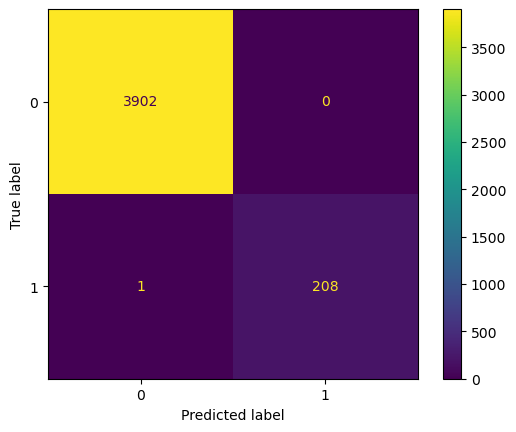

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
